In [150]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, MaxPooling2D, Flatten, Activation, ZeroPadding2D, Dropout,Reshape, InputLayer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [151]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_size = x_train.shape[1]

In [152]:
kernel_size = 3
batch_size = 32

In [153]:
#Building the model
model = Sequential([
    #Encoder design
    InputLayer(input_shape=(x_train.shape[1],x_train.shape[1],1)),
    Conv2D(filters=32,kernel_size=kernel_size,padding='same', activation='relu',strides=2),
    Conv2D(filters=64,kernel_size=kernel_size,padding='same', activation='relu',strides=2),
    Flatten(),
    Dense(16),
    
    #Decoder design
    Dense(7*7*64),
    Reshape((7,7,64)),
    Conv2DTranspose(filters=64,kernel_size=kernel_size,padding='same', activation='relu',strides=2),
    Conv2DTranspose(filters=32,kernel_size=kernel_size,padding='same', activation='relu',strides=2),
    Conv2DTranspose(filters=1,kernel_size=kernel_size,padding='same', activation='relu') 
])

model.compile(loss='mse', optimizer='adam')

In [154]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_57 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_30 (Flatten)        (None, 3136)              0         
                                                                 
 dense_60 (Dense)            (None, 16)                50192     
                                                                 
 dense_61 (Dense)            (None, 3136)              53312     
                                                                 
 reshape_25 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_66 (Conv2D  (None, 14, 14, 64)     

In [155]:
model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=1, batch_size=batch_size)

1875/1875 [==============================] - 17s 9ms/step - loss: 1078.8701 - val_loss: 697.5004


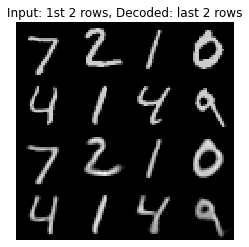

In [156]:
x_decoded = model.predict(x_test)
x_decoded = np.reshape(x_decoded,(-1, image_size , image_size ))
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
#plt.savefig('input_and_decoded.png')
plt.show()